In [1]:
import pandas as pd
import numpy as np
from cryodrgn.starfile import Starfile
from cryodrgn import analysis, utils, config

import pickle
import os, sys
import re
import argparse
import matplotlib.pyplot as plt
log = print
%matplotlib inline

In [2]:
def natural_sort_key(s):
    # Convert the string to a list of text and numbers
    parts = re.split('([0-9]+)', s)
    
    # Convert numeric parts to integers for proper numeric comparison
    parts[1::2] = map(int, parts[1::2])
    
    return parts

def generate_high_contrast_colors(num_colors=87):
    # Generate a list of 87 random colors with high contrast
    colors = ["#{:02x}{:02x}{:02x}".format(*np.random.randint(0, 256, 3)) for _ in range(num_colors)]
    
    # Plot small squares with the generated colors
    fig, ax = plt.subplots(1, num_colors, figsize=(num_colors, 1))
    for i in range(num_colors):
        ax[i].add_patch(plt.Rectangle((0, 0), 1, 1, color=colors[i]))
        ax[i].axis('off')
    
    # Show the plot to visualize the colors
    plt.show()
    
    return colors

### Dict for phi / theta

In [3]:
data_path = '/scratch/gpfs/ZHONGE/mj7341/research/00_moml/antibody/dataset/original/vols/conformational/'
filenames = os.listdir(data_path)

sorted_files = sorted(filenames, key=natural_sort_key)

rot_dict = {}
for i, filename in enumerate(sorted_files):
    if filename:
        types = filename.split('_')[2]
        angles = filename.split('_')[-1].split('.')[0]
        key = str(i+1)
        value = types+'_'+angles
        rot_dict[key]=value

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/gpfs/ZHONGE/mj7341/research/00_moml/antibody/dataset/original/vols/conformational/'

In [ ]:
axial_angles = np.concatenate((np.arange(36)*5,-np.arange(1,37)*5,np.zeros(15)))
dihedral_angles = np.concatenate((np.zeros(72),np.arange(8)*5,-np.arange(1,8)*5))

# 3D Classification

In [11]:
path_for_label = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J25/J25_00036_particles.cs'
path_for_model = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J25/'

In [12]:
def parse_class_assignments(path_for_label, path_for_model, K):
    # for labels
    cs = np.load(path_for_label)
    keys = ["alignments_class3D_{}/class_posterior".format(i) for i in range(K)]
    classes = [[x[k] for k in keys] for x in cs]
    classes = np.asarray(classes)
    class_id = classes.argmax(axis=1)
    
    # for models
    model_lst = []
    cs_model_path = [path_for_model+"J25_passthrough_particles_class_{}.cs".format(i) for i in range(K)]
    for i in range(K):
        cs_model = np.load(cs_model_path[i])
        for j in range(len(cs_model)):
            num_vol = cs_model[j][1].split(b'_')[1].decode('utf-8')
            model_lst.append(num_vol)
    model_id = np.asarray(model_lst)
            
    return class_id, model_id

In [16]:
labels_3dcls, models_3dcls = parse_class_assignments(path_for_label, path_for_model, 5)

In [51]:
labels_3dcls.shape

(87000,)

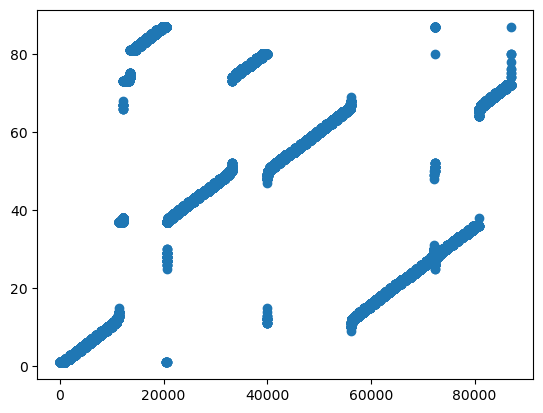

In [8]:
plt.scatter(np.arange(87000),models_3dcls.astype(int))

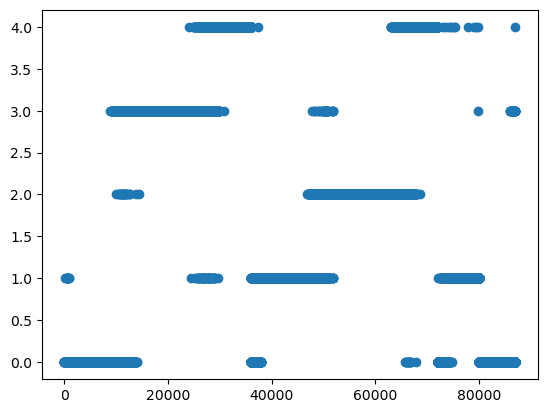

In [9]:
plt.scatter(np.arange(87000), labels_3dcls)

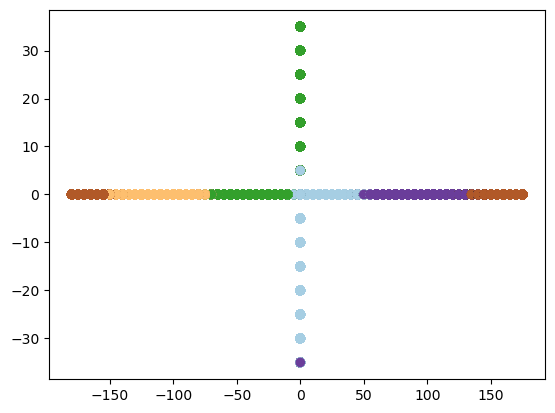

In [12]:
xx = np.repeat(axial_angles,1000)
yy = np.repeat(dihedral_angles,1000)
plt.scatter(xx,yy,cmap='Paired',c=labels_3dcls)

In [13]:
x = np.random.rand(len(filenames))
y = x + np.random.normal(0, 0.1, size=len(x))

jitter=0.05
x_jittered = x + np.random.uniform(-jitter, jitter, size=len(x))
y_jittered = y + np.random.uniform(-jitter, jitter, size=len(y))

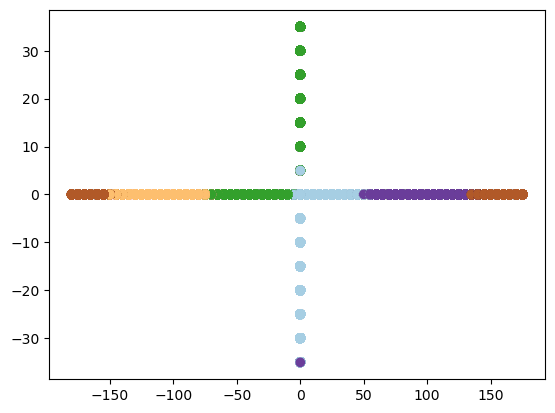

In [14]:
xx = np.repeat(axial_angles,1000)
yy = np.repeat(dihedral_angles,1000)
jitter=0.05
xx_jittered = xx + np.random.uniform(-jitter, jitter, size=len(xx))
yy_jittered = yy + np.random.uniform(-jitter, jitter, size=len(yy))
plt.scatter(xx_jittered,yy_jittered,cmap='Paired',c=labels_3dcls)

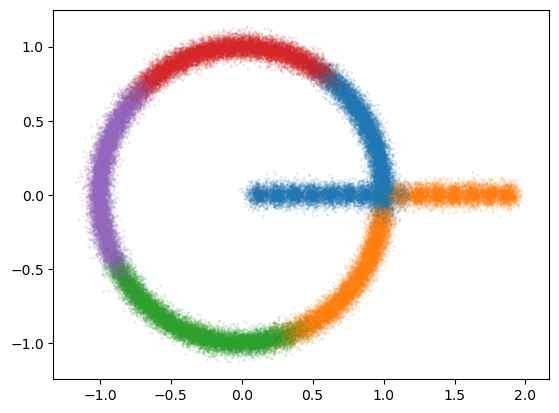

In [18]:
x = np.repeat(axial_angles,1000)
y = np.repeat(dihedral_angles,1000)
xx = np.cos(x/180*np.pi)
yy = np.sin(x/180*np.pi)
xx += y/40
jitter=0.04
xx_jittered = xx + np.random.randn(len(xx))*jitter
yy_jittered = yy + np.random.randn(len(yy))*jitter
plt.scatter(xx_jittered,yy_jittered,cmap='tab10',s=1,alpha=.1,c=labels_3dcls, vmin=0,vmax=10)
plt.savefig("3dcls_5.png")

### Num Class = 10

In [53]:
path_for_label = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J17/J17_00019_particles.cs'
path_for_model = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J17/'

In [54]:
def parse_class_assignments(path_for_label, path_for_model, K):
    # for labels
    cs = np.load(path_for_label)
    keys = ["alignments_class3D_{}/class_posterior".format(i) for i in range(K)]
    classes = [[x[k] for k in keys] for x in cs]
    classes = np.asarray(classes)
    class_id = classes.argmax(axis=1)
    
    # for models
    model_lst = []
    cs_model_path = [path_for_model+"J17_passthrough_particles_class_{}.cs".format(i) for i in range(K)]
    for i in range(K):
        cs_model = np.load(cs_model_path[i])
        for j in range(len(cs_model)):
            num_vol = cs_model[j][1].split(b'_')[1].decode('utf-8')
            model_lst.append(num_vol)
    model_id = np.asarray(model_lst)
            
    return class_id, model_id

In [55]:
labels_3dcls, models_3dcls = parse_class_assignments(path_for_label, path_for_model, 10)

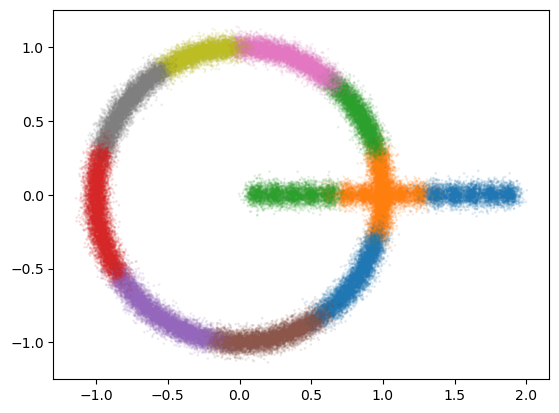

In [57]:
x = np.repeat(axial_angles,1000)
y = np.repeat(dihedral_angles,1000)
xx = np.cos(x/180*np.pi)
yy = np.sin(x/180*np.pi)
xx += y/40
jitter=0.04
xx_jittered = xx + np.random.randn(len(xx))*jitter
yy_jittered = yy + np.random.randn(len(yy))*jitter
plt.scatter(xx_jittered,yy_jittered,cmap='tab10',s=1,alpha=.1,c=labels_3dcls, vmin=0,vmax=10)

# 3DVA

In [19]:
path = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J57/J57_particles.cs'
x = np.load(path)

In [20]:
v = np.empty((len(x),5))
for i in range(5):
    v[:,i] = x[f'components_mode_{i}/value']

Total

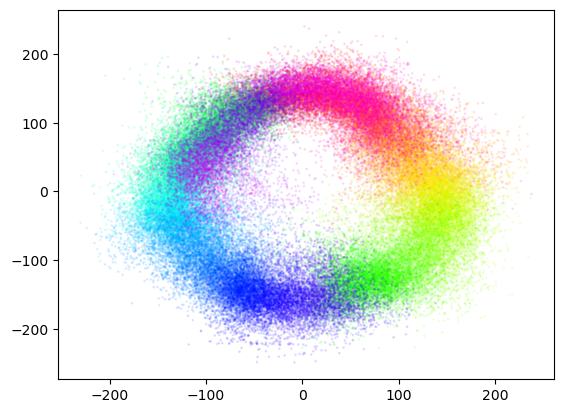

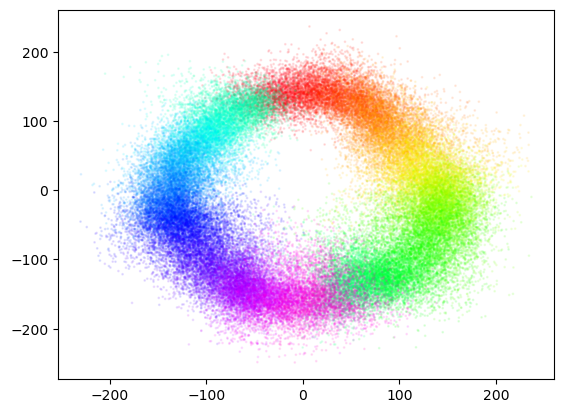

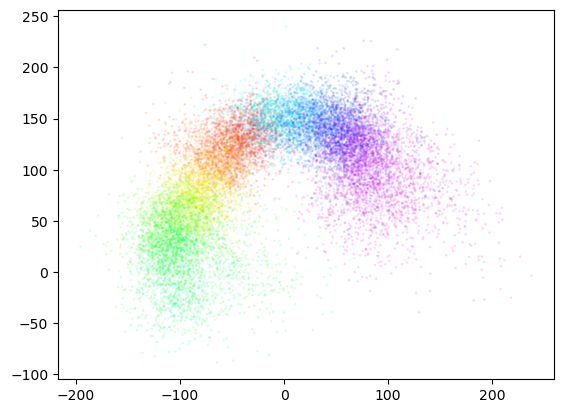

In [21]:
subset = v[:87000]
c = np.repeat(np.linspace(0,1,87),1000)
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = v[:72000]
c = np.repeat(np.linspace(0,1,72),1000)
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = v[72000:]
c = np.repeat(np.linspace(0,1,15),1000)
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

Axial angles

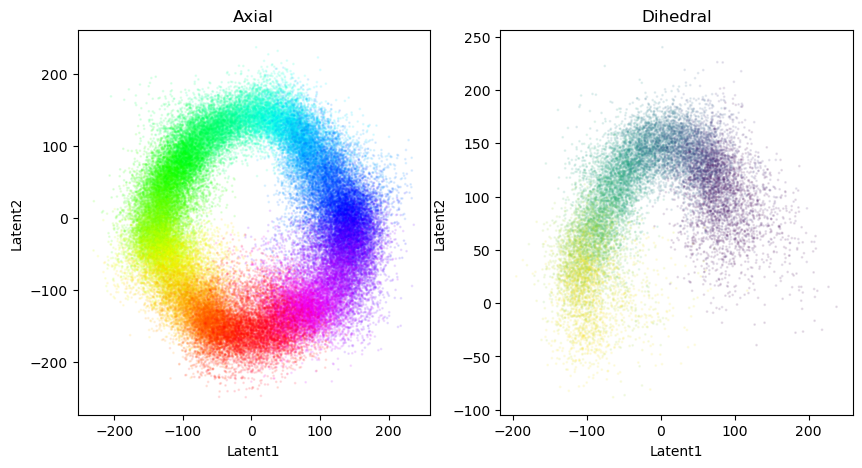

In [40]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
plot_dim = (0,1)
subset = v[:87000]
# Axial angles
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
# axs[0].scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
subset = v[:72000]
c = c_all[:72000]
axs[0].scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)

# Dihedral angles
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='viridis', vmin=-35,vmax=35)
subset = v[72000:]
c = c_all[72000:]
axs[1].scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)

axs[0].set_title('Axial')
axs[1].set_title('Dihedral')

for ax in axs.flat:
    ax.set(xlabel='Latent1', ylabel='Latent2')

# plt.show()
plt.savefig("3dva_5.png")

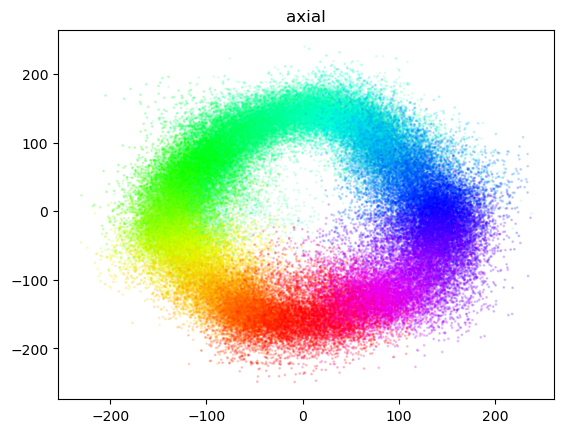

In [32]:
subset = v[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c, vmin=-180, vmax=175)
plt.title('whole')
plt.show()

subset = v[:72000]
c = c_all[:72000]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c, vmin=-180, vmax=175)
plt.title('axial')
plt.show()

subset = v[72000:]
c = c_all[72000:]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c, vmin=-180, vmax=175)
plt.show()

Dihedral angles

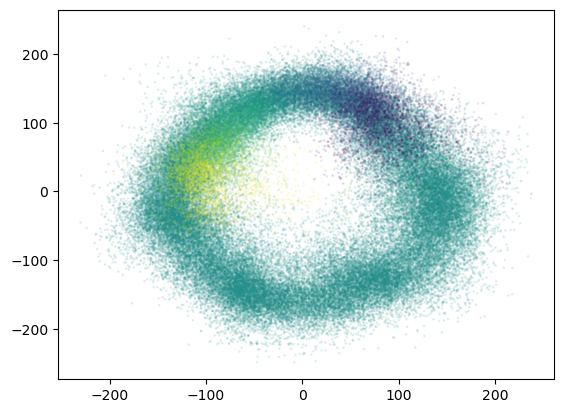

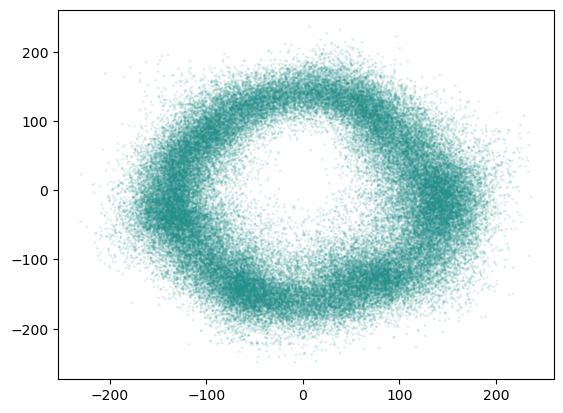

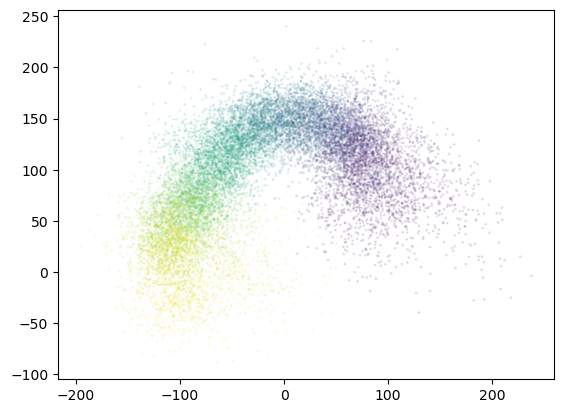

In [28]:
plot_dim = (0,1)
subset = v[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='viridis', vmin=-35,vmax=35)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = v[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = v[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()


### UMap

In [24]:
# umap_latent = analysis.run_umap(v) # v: latent space

# save_dir = '/scratch/gpfs/ZHONGE/mj7341/cryosim/visualization'
# np.save(f"{save_dir}/3dva/umap/umap_latent.npy", umap_latent)

In [25]:
save_dir = '/scratch/gpfs/ZHONGE/mj7341/cryosim/visualization'
umap_latent = np.load(f"{save_dir}/3dva/umap/umap_latent.npy")

Axial angles

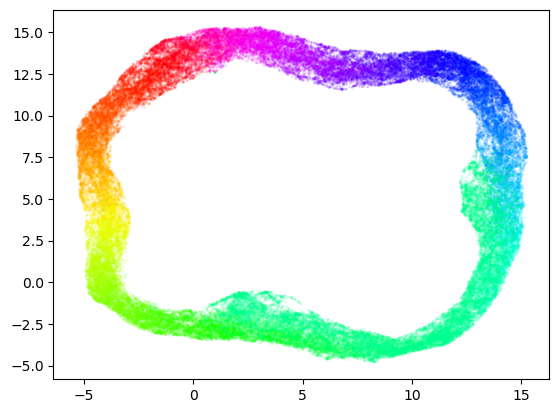

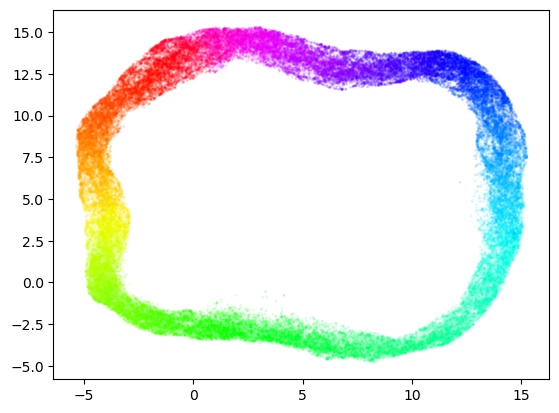

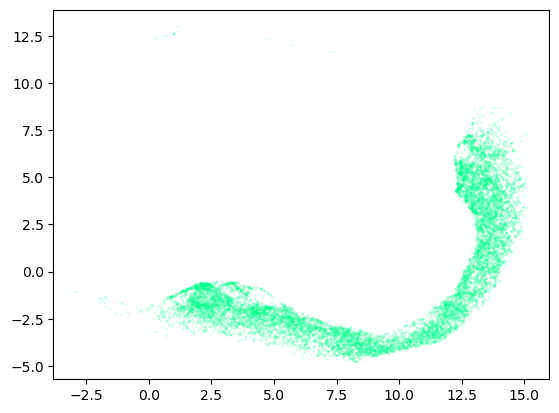

In [26]:
plot_dim = (0,1)
data = umap_latent
subset = data[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()


Dihedral angles

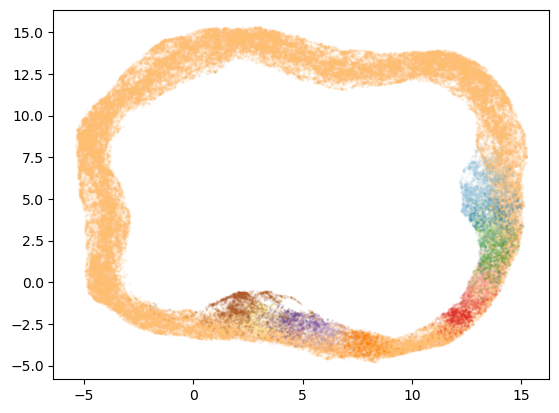

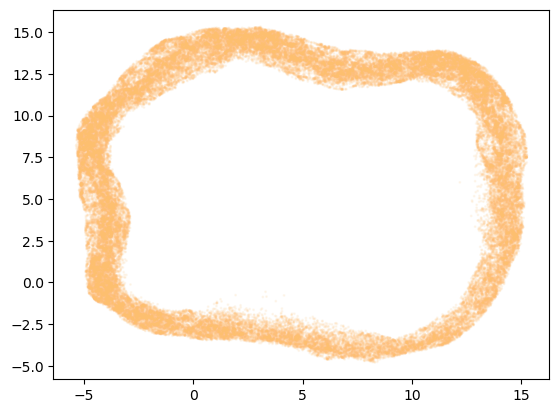

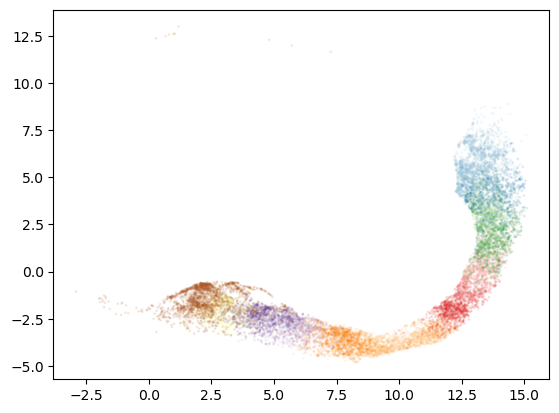

In [27]:
plot_dim = (0,1)
data = umap_latent
subset = data[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='Paired', vmin=-35,vmax=35)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

# 3DFlex

In [29]:
path = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-chimera-resample-data/J44/J44_latents_010784.cs'
x = np.load(path)

In [5]:
path = '/scratch/gpfs/ZHONGE/mj7341/cryosparc/CS-new-mask-for-confhet-v1/J11/J11_latents_010784.cs'
x = np.load(path)

In [6]:
v = np.empty((len(x),2))
for i in range(2):
    v[:,i] = x[f'components_mode_{i}/value']

### Latent Z

Axial angles

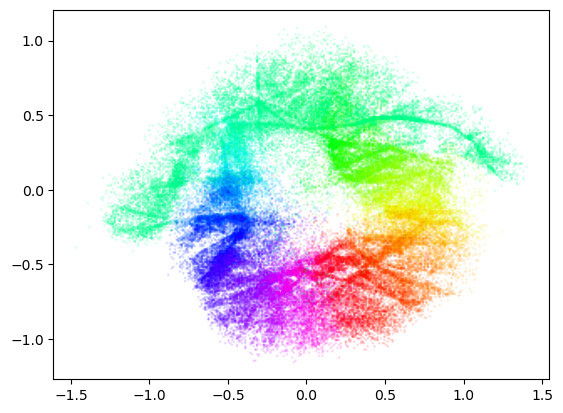

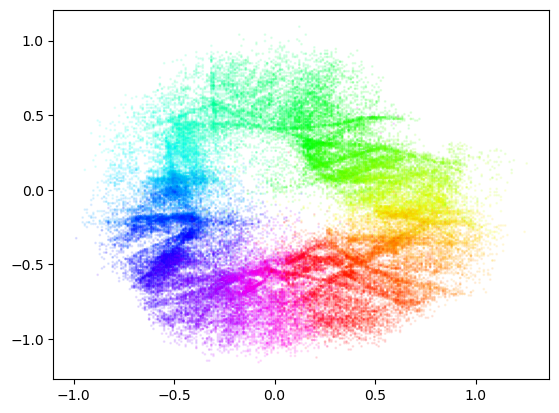

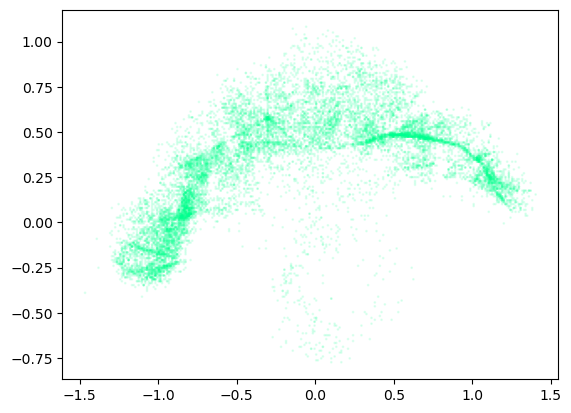

In [7]:
subset = v[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = v[:72000]
c = c_all[:72000]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = v[72000:]
c = c_all[72000:]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c, vmin=-180, vmax=175)
plt.show()

Dihedral angles

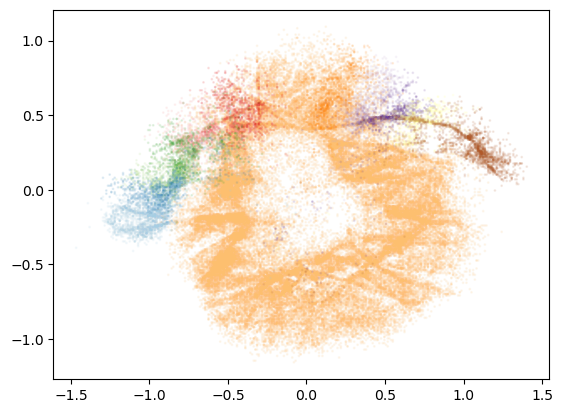

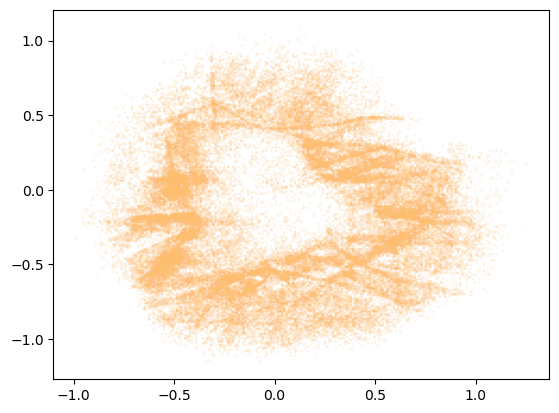

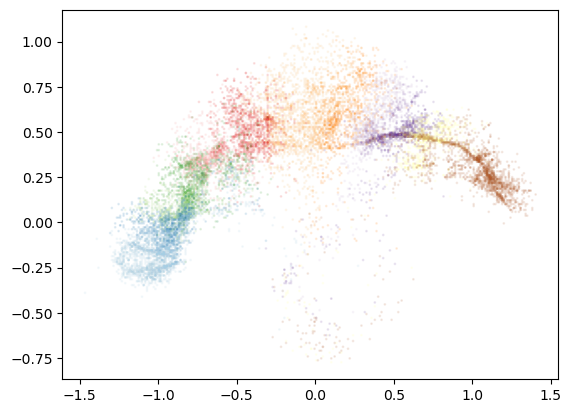

In [8]:
plot_dim = (0,1)
subset = v[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='Paired', vmin=-35,vmax=35)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = v[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = v[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

### Umap

In [9]:
umap_latent = analysis.run_umap(v) # v: latent space

save_dir = '/scratch/gpfs/ZHONGE/mj7341/cryosim/visualization'
np.save(f"{save_dir}/3dflex/umap/umap_latent_new_mask.npy", umap_latent)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/gpfs/ZHONGE/mj7341/cryosim/visualization/3dflex/umap/umap_latent_new_mask.npy'

In [34]:
save_dir = '/scratch/gpfs/ZHONGE/mj7341/cryosim/visualization'
umap_latent = np.load(f"{save_dir}/3dflex/umap/umap_latent.npy")

Axial angles

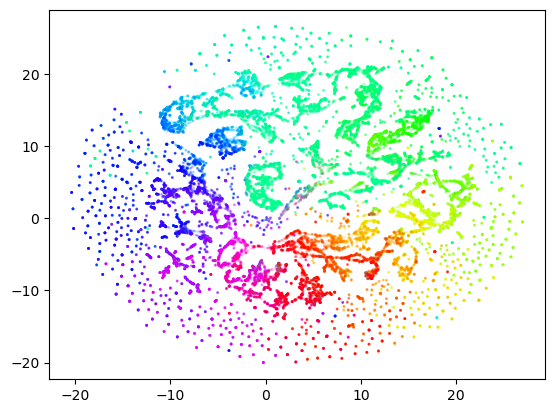

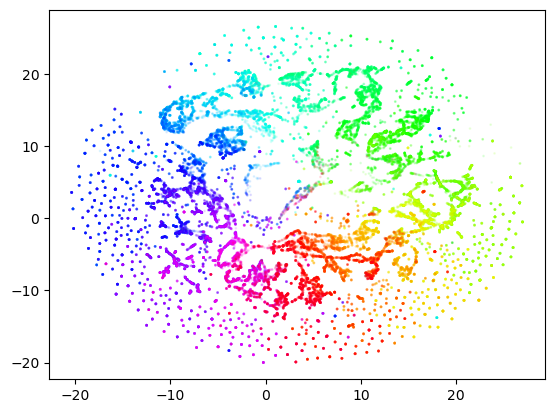

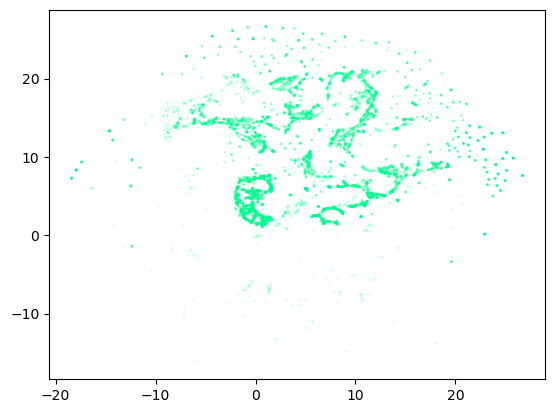

In [35]:
plot_dim = (0,1)
data = umap_latent
subset = data[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

Dihedral angles

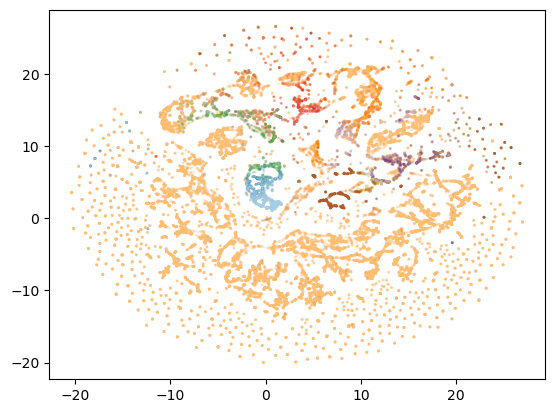

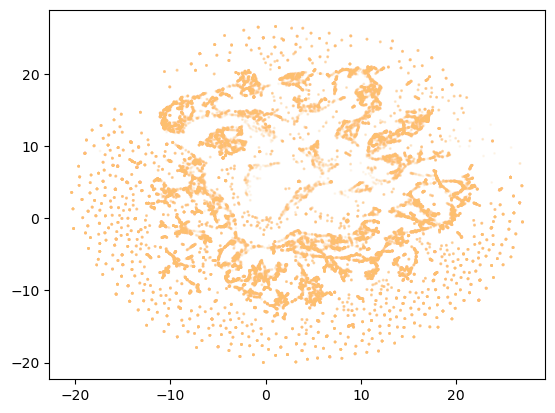

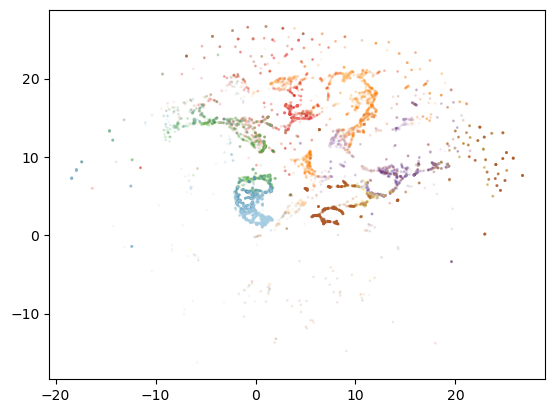

In [36]:
plot_dim = (0,1)
data = umap_latent
subset = data[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='Paired', vmin=-35,vmax=35)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

# CryoDRGN

In [37]:
latent_z = '/scratch/gpfs/ZHONGE/mj7341/cryosim/results/conformational/addnoise_chimera_resample_snr01_conformation_vae128/z.49.pkl'
umap_pkl = '/scratch/gpfs/ZHONGE/mj7341/cryosim/results/conformational/addnoise_chimera_resample_snr01_conformation_vae128/analyze.49/umap.pkl'

In [38]:
latent_z = open(latent_z, 'rb')
drgn_z = pickle.load(latent_z)

umap_pkl = open(umap_pkl, 'rb')
drgn_umap = pickle.load(umap_pkl)

### Latent Z

Axial angles

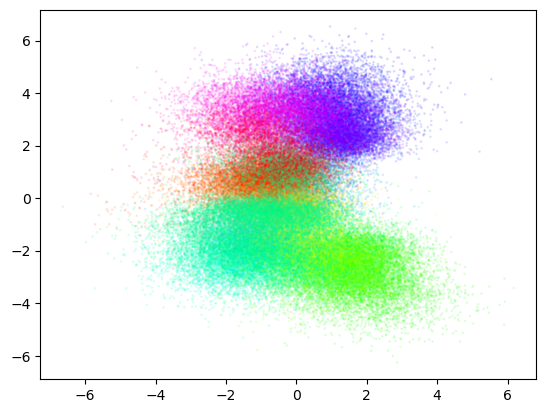

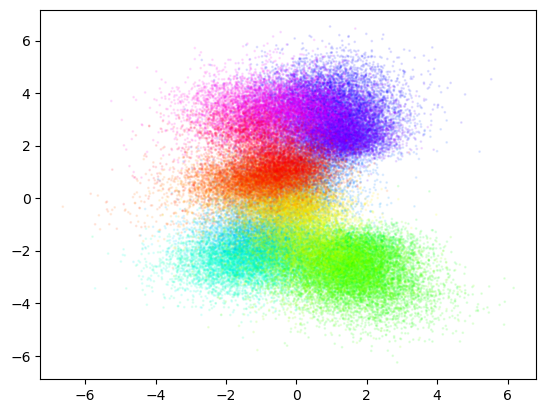

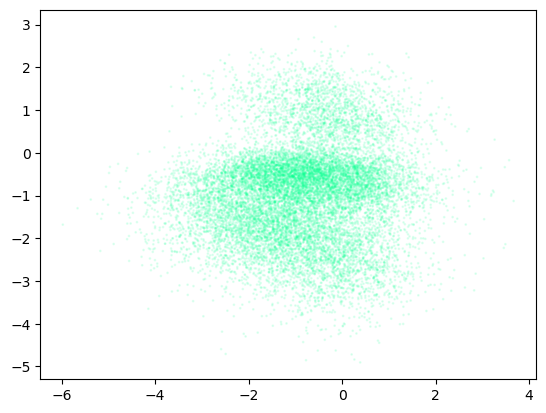

In [39]:
subset = drgn_z[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = drgn_z[:72000]
c = c_all[:72000]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c)
plt.show()

subset = drgn_z[72000:]
c = c_all[72000:]
plt.scatter(subset[:,0], subset[:,1], alpha=.1, s=1, cmap='gist_rainbow', c=c, vmin=-180, vmax=175)
plt.show()

Dihedral angles

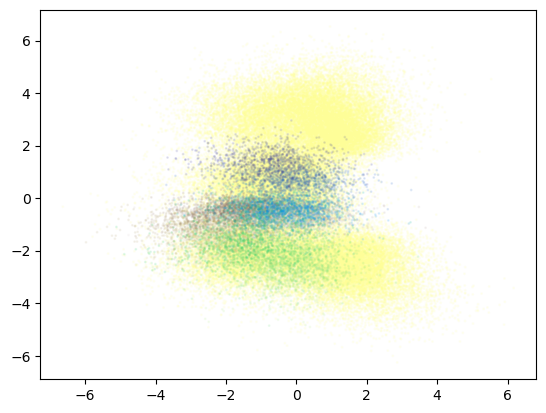

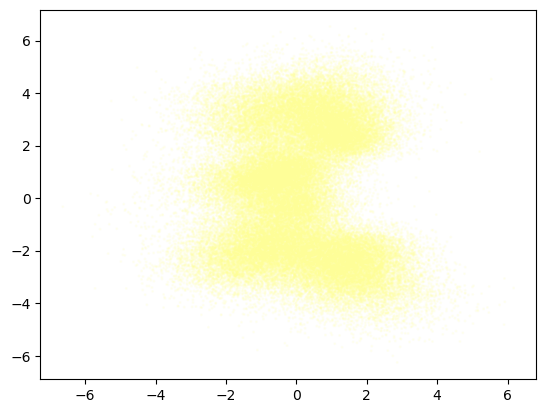

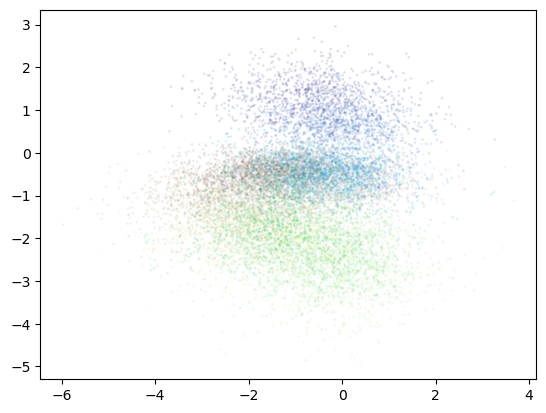

In [40]:
plot_dim = (0,1)
subset = drgn_z[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='terrain', vmin=-35,vmax=35)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = drgn_z[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = drgn_z[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

### Umap

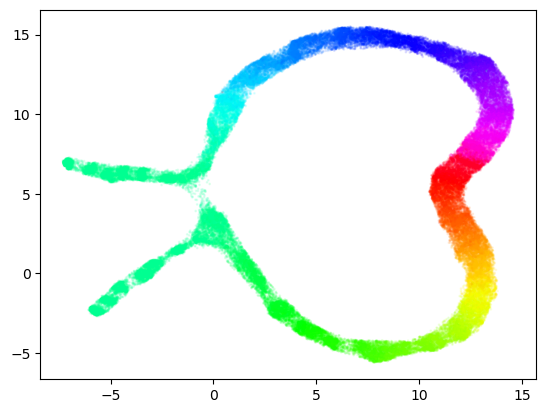

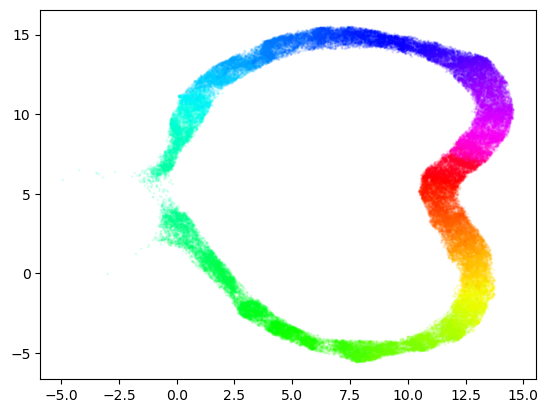

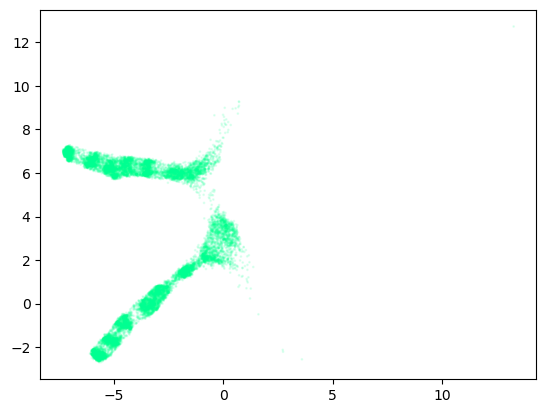

In [41]:
plot_dim = (0,1)
data = drgn_umap
subset = data[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()


Dihedral angles

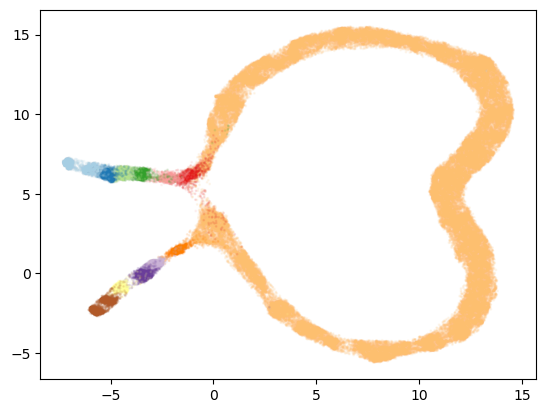

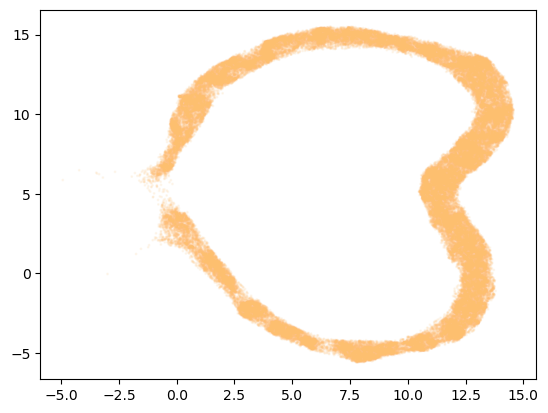

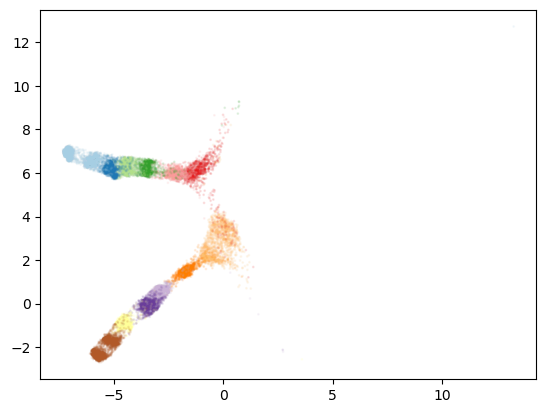

In [42]:
plot_dim = (0,1)
data = drgn_umap
subset = data[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='Paired', vmin=-35,vmax=35) # change cmap! (dihedral / axial -- orthogonal!!)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

# CryoDRGN 2

In [4]:
latent_z = '/scratch/gpfs/ZHONGE/mj7341/cryosim/results/conformational/cryodrgn2_addnoise_chimera_resample_conformation_vae128/z.29.pkl'
umap_pkl = '/scratch/gpfs/ZHONGE/mj7341/cryosim/results/conformational/cryodrgn2_addnoise_chimera_resample_conformation_vae128/analyze.29/umap.pkl'

In [5]:
latent_z = open(latent_z, 'rb')
drgn2_z = pickle.load(latent_z)

umap_pkl = open(umap_pkl, 'rb')
drgn2_umap = pickle.load(umap_pkl)

### UMap

Axial angles

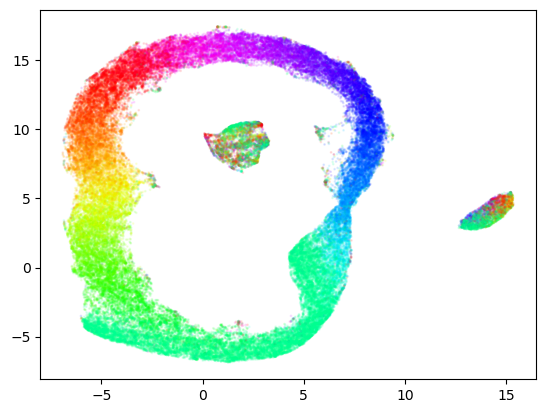

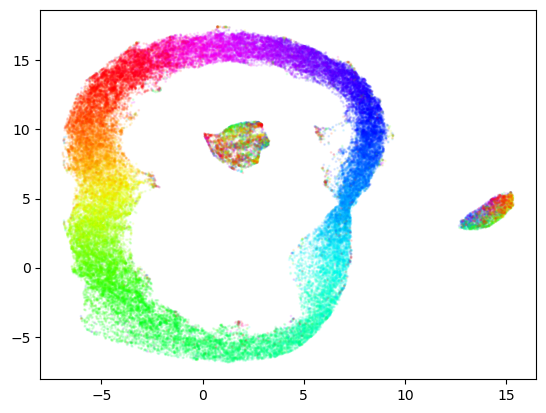

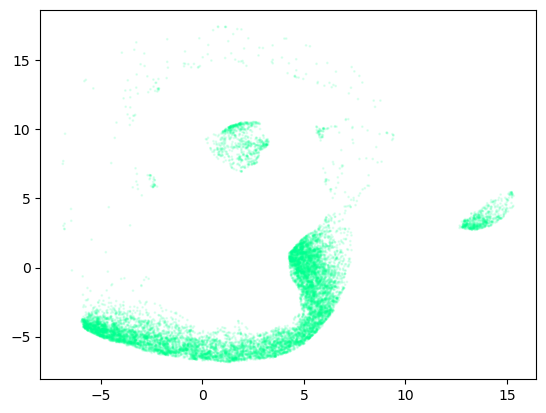

In [8]:
plot_dim = (0,1)
data = drgn2_umap
subset = data[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

Dihedral angles

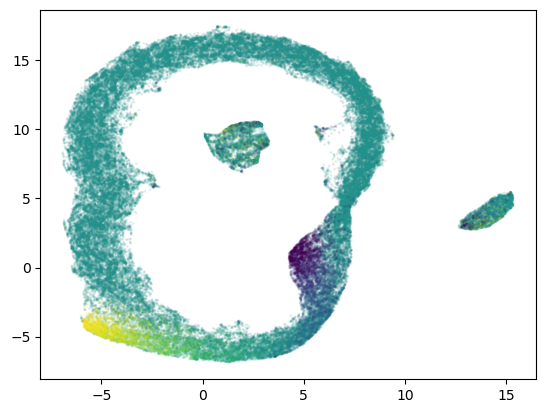

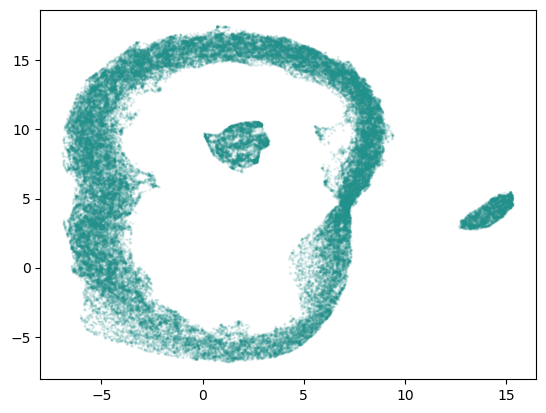

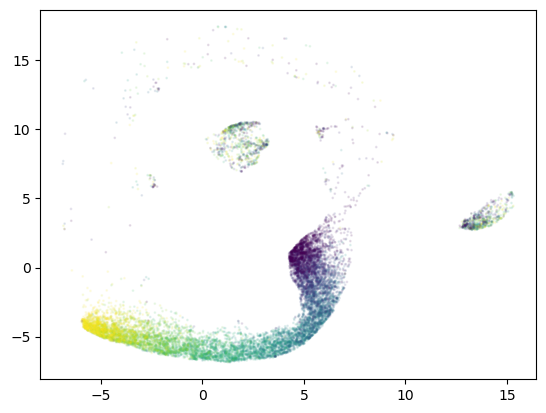

In [10]:
plot_dim = (0,1)
data = drgn2_umap
subset = data[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='viridis', vmin=-35,vmax=35) # change cmap! (dihedral / axial -- orthogonal!!)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

# OPUS-DSD

In [43]:
latent_z = '/scratch/gpfs/ZHONGE/mj7341/opusDSD/work/sp/z.19.pkl'
umap_pkl = '/scratch/gpfs/ZHONGE/mj7341/opusDSD/work/sp/analyze.19/umap.pkl'

In [9]:
import torch
latent_z = torch.load(latent_z)["mu"].cpu().numpy()

In [44]:
# latent_z = open(latent_z, 'rb')
# opus_z = pickle.load(latent_z)

umap_pkl = open(umap_pkl, 'rb')
opus_umap = pickle.load(umap_pkl)

### UMap

Axial angles

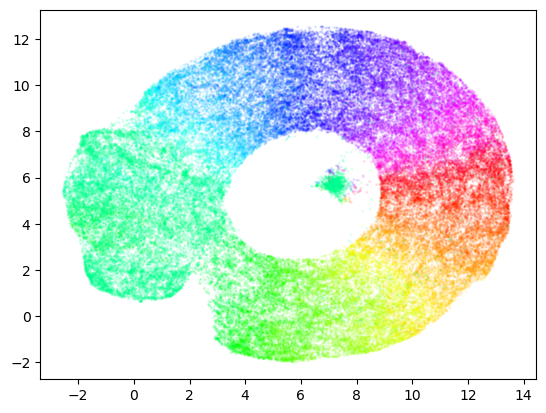

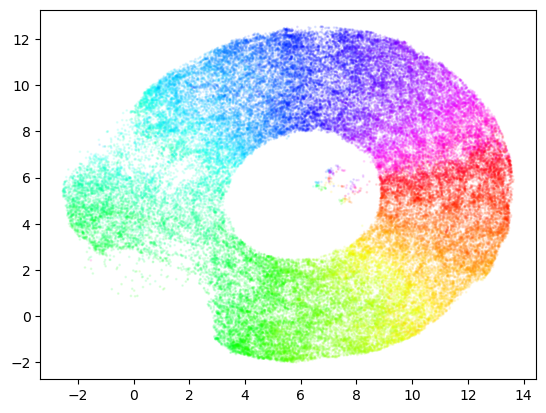

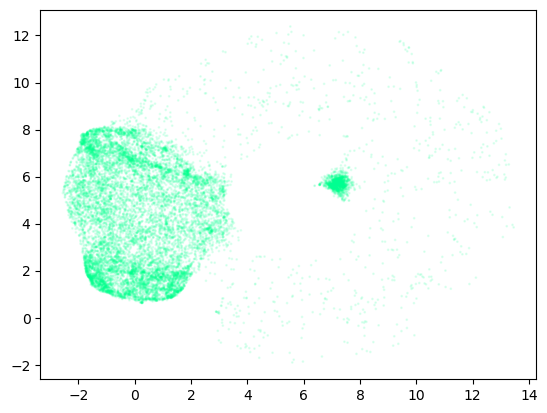

In [45]:
plot_dim = (0,1)
data = opus_umap
subset = data[:87000]
c_all = np.repeat(axial_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='gist_rainbow', vmin=-180,vmax=175)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

Dihedral angles

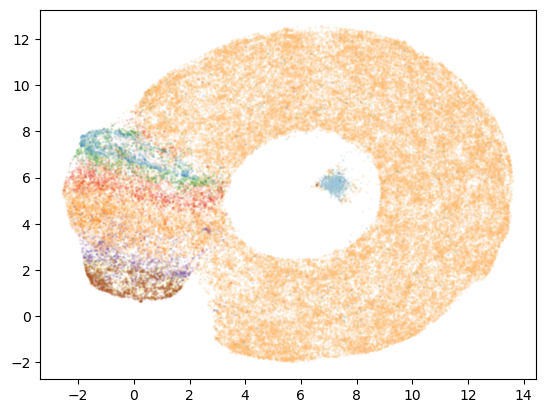

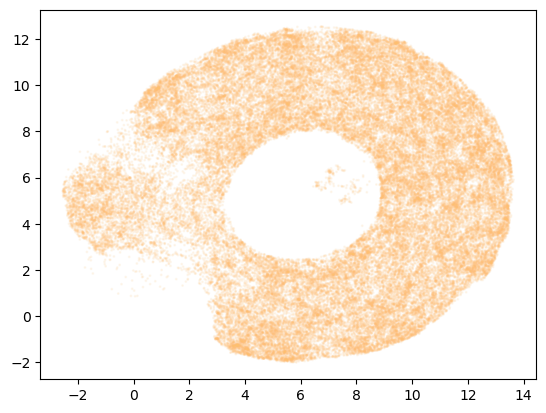

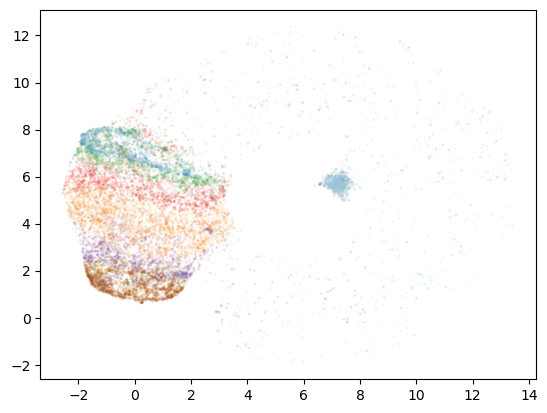

In [46]:
plot_dim = (0,1)
data = opus_umap
subset = data[:87000]
c_all = np.repeat(dihedral_angles,1000)
c = c_all
plot_args = dict(alpha=.1, s=1, cmap='Paired', vmin=-35,vmax=35) # change cmap! (dihedral / axial -- orthogonal!!)
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[:72000]
c = c_all[:72000]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()

subset = data[72000:]
c = c_all[72000:]
plt.scatter(subset[:,plot_dim[0]], subset[:,plot_dim[1]], c=c, **plot_args)
plt.show()